In [1]:
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

In [3]:
image_folder = '/kaggle/input/harmful-object-detection/Harmful Object Detection/Images'
annotation_folder = '/kaggle/input/harmful-object-detection/Harmful Object Detection/Labels'

# YOLO class labels
classes_file = '/kaggle/input/harmful-object-detection/Harmful Object Detection/Labels/classes.txt'  # Modify with actual path if needed
with open(classes_file, 'r') as f:
    classes = f.read().splitlines()

In [4]:
def read_yolo_annotation(annotation_file):
    with open(annotation_file, 'r') as file:
        lines = file.readlines()
    annotations = []
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        annotations.append((int(class_id), x_center, y_center, width, height))
    return annotations

# Collecting EDA stats
image_sizes = []
bbox_sizes = []
class_counts = Counter()

In [5]:
for image_file in os.listdir(image_folder):
    if image_file.endswith(('.jpg', '.png', '.jpeg')):
        # Read image and its size
        img_path = os.path.join(image_folder, image_file)
        image = cv2.imread(img_path)
        height, width, _ = image.shape
        image_sizes.append((width, height))
        
        # Corresponding annotation file
        annotation_file = os.path.join(annotation_folder, os.path.splitext(image_file)[0] + '.txt')
        if os.path.exists(annotation_file):
            annotations = read_yolo_annotation(annotation_file)
            for class_id, x_center, y_center, bbox_width, bbox_height in annotations:
                # Convert normalized bbox size to actual size
                actual_bbox_width = bbox_width * width
                actual_bbox_height = bbox_height * height
                bbox_sizes.append((actual_bbox_width, actual_bbox_height))
                class_counts[classes[class_id]] += 1

image_sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])
bbox_sizes_df = pd.DataFrame(bbox_sizes, columns=['BBox Width', 'BBox Height'])
class_counts_df = pd.DataFrame(class_counts.items(), columns=['Class', 'Count'])


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

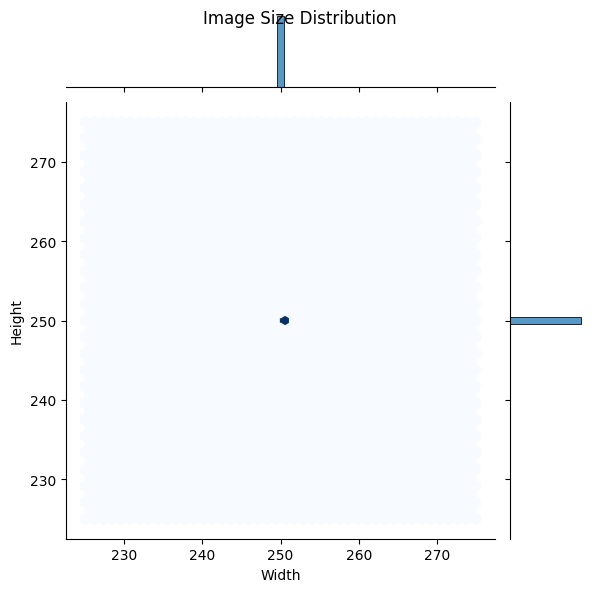

In [6]:
plt.figure(figsize=(10, 6))
sns.jointplot(data=image_sizes_df, x='Width', y='Height', kind='hex', cmap='Blues')
plt.suptitle("Image Size Distribution")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

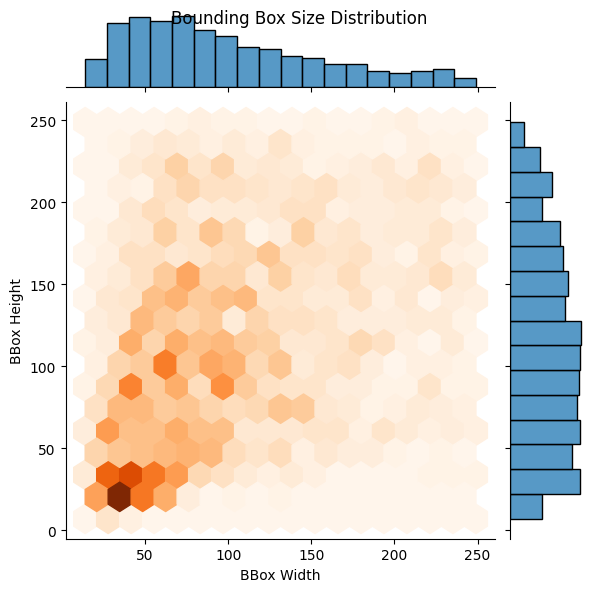

In [7]:
plt.figure(figsize=(10, 6))
sns.jointplot(data=bbox_sizes_df, x='BBox Width', y='BBox Height', kind='hex', cmap='Oranges')
plt.suptitle("Bounding Box Size Distribution")
plt.show()

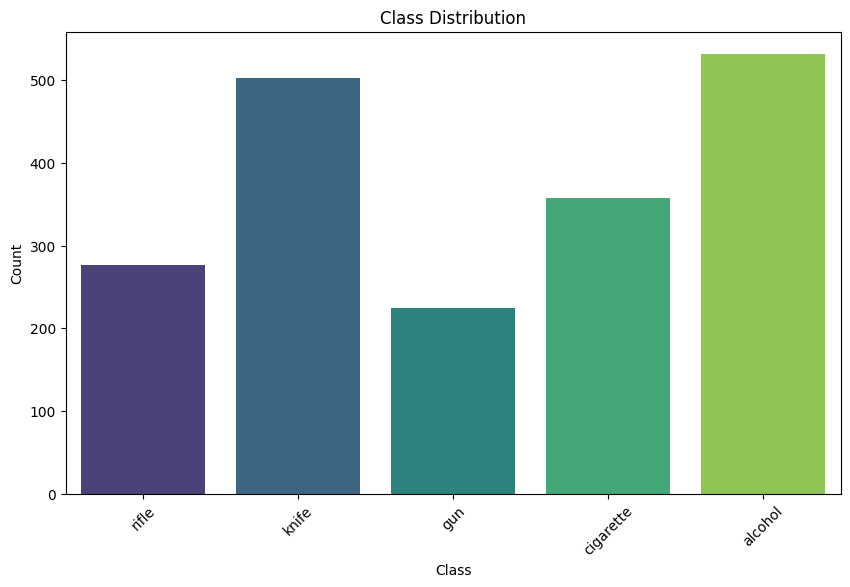

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', data=class_counts_df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Class Distribution')
plt.show()

In [9]:
sample_image = os.path.join(image_folder, os.listdir(image_folder)[0])
image = cv2.imread(sample_image)
height, width, _ = image.shape


In [10]:
sample_annotation = os.path.join(annotation_folder, os.path.splitext(os.path.basename(sample_image))[0] + '.txt')
annotations = read_yolo_annotation(sample_annotation)

for class_id, x_center, y_center, bbox_width, bbox_height in annotations:
    x_min = int((x_center - bbox_width / 2) * width)
    y_min = int((y_center - bbox_height / 2) * height)
    x_max = int((x_center + bbox_width / 2) * width)
    y_max = int((y_center + bbox_height / 2) * height)
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    cv2.putText(image, classes[class_id], (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)


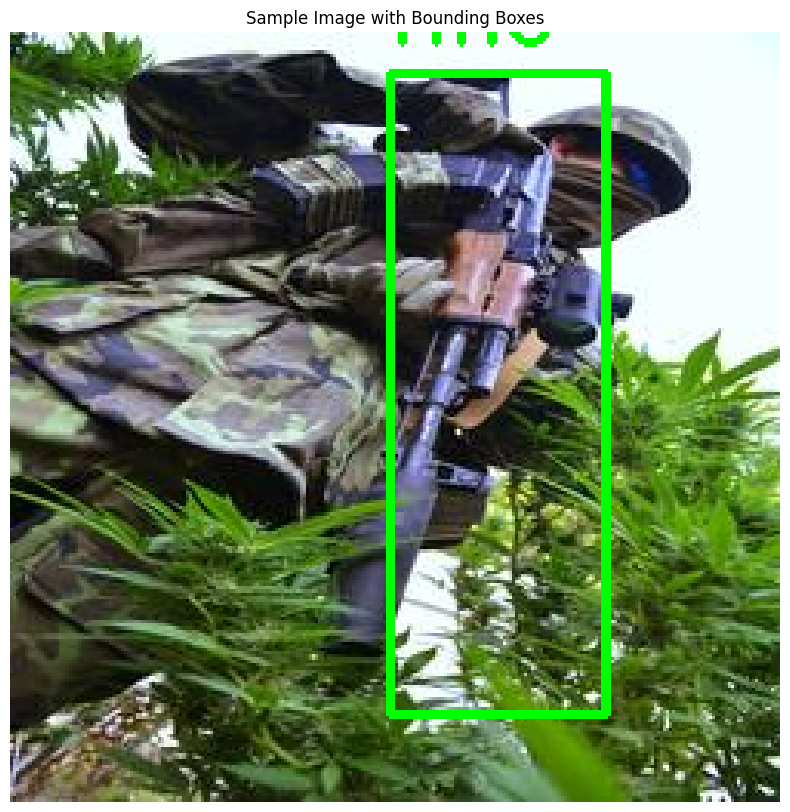

In [11]:
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Sample Image with Bounding Boxes")
plt.axis('off')
plt.show()